In [143]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from finta import TA
import pandas as pd
import plotly.graph_objects as go
import numpy as np

class stock():
    
    def __init__(self,name):
        self.stock_df = pd.DataFrame(yf.Ticker(name).history(period="max"))
        self.stock_df.columns = map(str.lower, self.stock_df.columns)
        self.name = name
        
    def Bollinger_bands_show(self,start,end, width = False , upper = True, lower = True):
        #La courbe représentant le cours de l'action suit une moyenne mobile à 7 jours(choix arbitraire)
        self.stock_df.columns = map(str.lower, self.stock_df.columns)
        bbands = TA.BBANDS(self.stock_df)
        sns.set()
        if upper :
            bbands[start:end].BB_UPPER.plot()
        if lower :
            bbands[start:end].BB_LOWER.plot()
        

        self.stock_df["open"][start:end].rolling(window=7, center =True).mean().plot(label="MA 7 jours",ls = ":")
        plt.show()
        if width :
            width = TA.BBWIDTH(self.stock_df)
            width[start:end].plot(label="Width", lw =3)
            plt.show()
        
    def cours_show(self):
        #Affiche le cours de l'action

        fig = go.Figure(data=go.Ohlc(x=self.stock_df.index,
            open=self.stock_df['open'],
            high=self.stock_df['high'],
            low=self.stock_df['low'],
            close=self.stock_df['close']))
        fig.show()
        
    def EMA_show(self,start,end):
        #Exponential Moving Average
        TA.EMA(self.stock_df)[start:end].plot()
        plt.show()
        
    def RSI_show(self,start,end):
        #Relative Strengh Indicator
        TA.RSI(self.stock_df)[start:end].plot()
        plt.show()
        
    def ROC_show(self,start,end):
        #Rate of Change
        TA.ROC(self.stock_df)[start:end].plot()
        plt.show()
        
    def MOM_show(self,start,end):
        #Rate of Change
        TA.ROC(self.stock_df)[start:end]

        return()
    
    def EMA(self):
        #Exponential Moving Average
        return TA.EMA(self.stock_df)
        
    def RSI(self):
        #Relative Strengh Indicator
        return TA.RSI(self.stock_df)
        
    def ROC(self):
        #Rate of Change
        return TA.ROC(self.stock_df)
        
    def MOM(self):
        #Momentum
        return TA.MOM(self.stock_df)
    
    def Bollinger_bands(self):
        return TA.BBANDS(self.stock_df)
    
    def Bollinger_width(self):
        return TA.BBWIDTH(self.stock_df)
    
    def price(self, var="open"):
        return(self.stock_df[var])
     
        
        
        
        

In [144]:
test = stock(name="^FCHI")
#test.RSI("2012","2013")
test.Bollinger_bands()
#test.EMA_show()

,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
1990-03-01,NaN,NaN,NaN
1990-03-02,NaN,NaN,NaN
1990-03-05,NaN,NaN,NaN
1990-03-06,NaN,NaN,NaN
1990-03-07,NaN,NaN,NaN
...,...,...,...
2021-03-18,6135.985960,5887.9815,5639.977040
2021-03-19,6145.709059,5899.2020,5652.694941
2021-03-22,6149.453294,5909.2540,5669.054706


In [265]:
#Création du dataset pour créer le model :
stock_ds = stock(name="OR.PA")

X = pd.DataFrame({"RSI" : stock_ds.RSI(), 
                  "MOM" : stock_ds.MOM(), 
                  "Bollinger Width" : stock_ds.Bollinger_width(), 
                  "ROC" : stock_ds.ROC(),
                 "Prices" : stock_ds.price()})

y = pd.DataFrame({"Prices" : stock_ds.price()})

X,y = X.dropna(), y.dropna()

X_train = X["2014-01":"2016-01"]
y_train = y["2016-02":"2018-02-25"]

X_test = X["2019-01-03":"2019-08"]
y_test = y["2019-02":"2019-09"]

y_train

,Prices
Date,
2016-02-01,142.89
2016-02-02,141.80
2016-02-03,141.58
2016-02-04,140.45
2016-02-05,139.09
...,...
2018-02-19,165.86
2018-02-20,164.17
2018-02-21,164.08


/Users/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



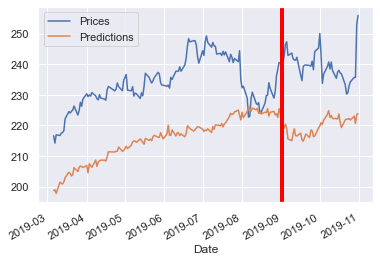

In [266]:
X_end = "2019-09"

X_test = X["2019-02":X_end]
y_test = y["2019-03-06":"2019-10"]


from sklearn.svm import SVR

model = SVR(kernel="linear")
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)

y_test["Predictions"] = y_pred
y_test.plot()
plt.axvline(x=X_end, ymin=0, ymax=190, lw = 4, color = "red")
plt.show()



In [247]:

y_test

,Prices,Predictions
Date,,
2019-03-06,216.61,199.252358
2019-03-07,214.23,199.665769
2019-03-08,216.90,200.742058
2019-03-11,216.71,205.479769
2019-03-12,217.47,204.327086
...,...,...
2019-10-25,234.25,231.091993
2019-10-28,235.71,232.422683
2019-10-29,235.71,230.372952


,0
0,165.896354
1,163.744483
2,164.731660
3,164.594064
4,165.550572
...,...
166,183.557384
167,183.938125
168,184.459597
169,183.746382
